In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers,models

In [49]:
data=pd.read_csv('Google_Stock_Price_Train.csv')

In [50]:
data.head()

,Date,Open,High,Low,Close,Volume
0,01/03/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,01/04/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,01/05/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,01/06/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,01/09/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [51]:
train_data=data.iloc[:,1:2].values

In [52]:
train_data.shape

(1509, 1)

In [53]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
train_scaled=sc.fit_transform(train_data)

In [54]:
x_train=[]
y_train=[]
for i in range(60,len(train_scaled)):
  x_train.append(train_scaled[i-60:i,0])
  y_train.append(train_scaled[i, 0])

x_train,y_train=np.array(x_train),np.array(y_train)


In [55]:
x_train=np.reshape(x_train,newshape=(x_train.shape[0],x_train.shape[1],1))

In [56]:
x_train.shape

(1449, 60, 1)

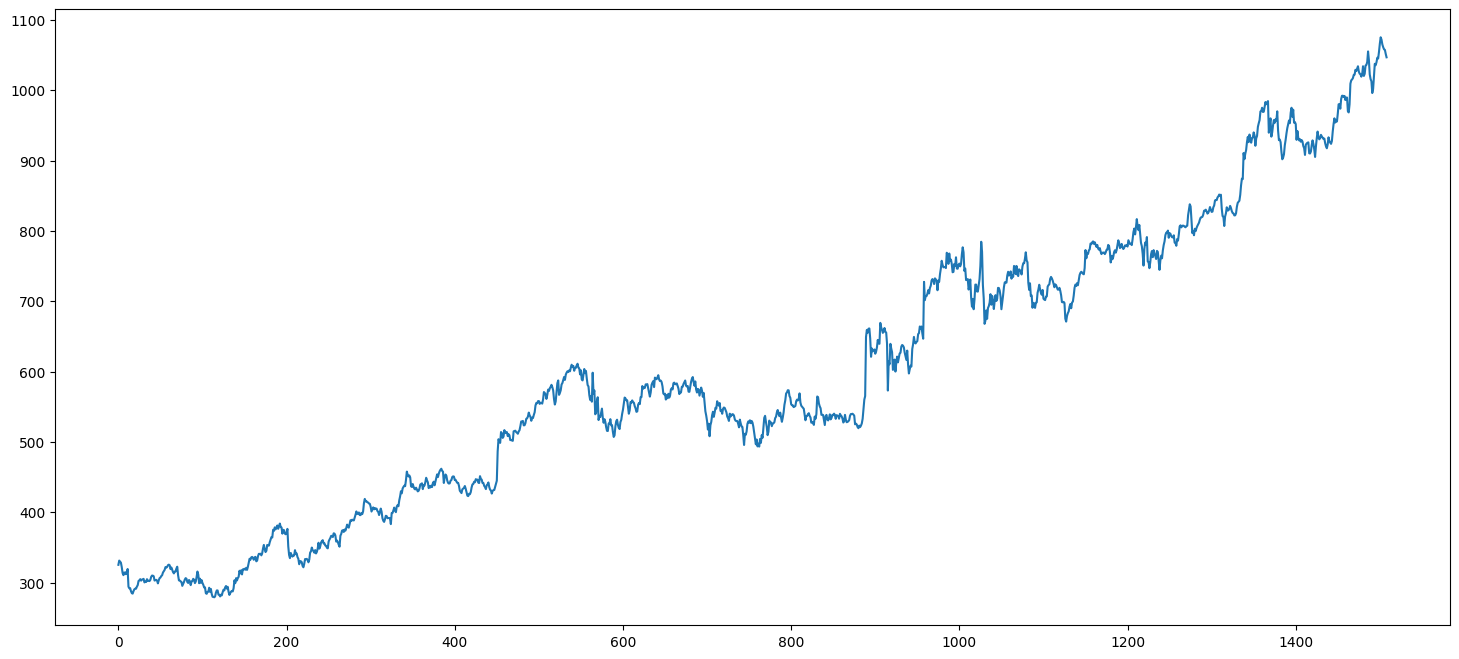

In [57]:

plt.figure(figsize=(18,8))
plt.plot(data['Open'])
plt.show()

In [58]:
model=models.Sequential()

In [59]:
model.add(layers.LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(layers.Dropout(rate=0.2))
model.add(layers.LSTM(units=50,return_sequences=True))
model.add(layers.Dropout(rate=0.2))
model.add(layers.LSTM(units=50,return_sequences=True))
model.add(layers.Dropout(rate=0.2))
model.add(layers.LSTM(units=50,return_sequences=False))
model.add(layers.Dropout(rate=0.2))
model.add(layers.Dense(units=1))

In [60]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 60, 50)            10400     
                                                                 
 dropout_6 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_7 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_7 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_8 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_8 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_9 (LSTM)               (None, 50)               

In [61]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [62]:
model.fit(x=x_train,y=y_train,epochs=100,batch_size=32)

Epoch 1/100
46/46 [==============================] - 14s 125ms/step - loss: 0.0274
Epoch 2/100
46/46 [==============================] - 5s 112ms/step - loss: 0.0039
Epoch 3/100
46/46 [==============================] - 5s 104ms/step - loss: 0.0035
Epoch 4/100
46/46 [==============================] - 6s 134ms/step - loss: 0.0035
Epoch 5/100
46/46 [==============================] - 5s 109ms/step - loss: 0.0031
Epoch 6/100
46/46 [==============================] - 6s 130ms/step - loss: 0.0037
Epoch 7/100
46/46 [==============================] - 5s 105ms/step - loss: 0.0034
Epoch 8/100
46/46 [==============================] - 5s 108ms/step - loss: 0.0032
Epoch 9/100
46/46 [==============================] - 6s 125ms/step - loss: 0.0029
Epoch 10/100
46/46 [==============================] - 5s 107ms/step - loss: 0.0029
Epoch 11/100
46/46 [==============================] - 6s 127ms/step - loss: 0.0025
Epoch 12/100
46/46 [==============================] - 5s 107ms/step - loss: 0.0028
Epoch 13/100

In [63]:
test_data=pd.read_csv('Google_Stock_Price_Test.csv')

In [64]:
test_data.head()

,Date,Open,High,Low,Close,Volume
0,02/01/2018,1048.339966,1066.939941,1045.229980,1065.000000,1237600
1,03/01/2018,1064.310059,1086.290039,1063.209961,1082.479980,1430200
2,04/01/2018,1088.000000,1093.569946,1084.001953,1086.400024,1004600
3,05/01/2018,1094.000000,1104.250000,1092.000000,1102.229980,1279100
4,08/01/2018,1102.229980,1111.270020,1101.619995,1106.939941,1047600


In [65]:
real_prices=test_data.iloc[:,1:2].values

In [66]:
real_prices.shape

(125, 1)

In [67]:
total_data=pd.concat((data['Open'],test_data['Open']),axis=0)
inputs=total_data[len(total_data) - len(test_data) - 60:].values

In [68]:
inputs=inputs.reshape(-1, 1)
inputs=sc.transform(inputs)


In [70]:
x_test=[]
for i in range(60,len(inputs)):
  x_test.append(inputs[i-60:i,0])

x_test=np.array(x_test)
x_test=np.reshape(x_test,newshape=(x_test.shape[0],x_test.shape[1],1))

In [71]:
predicted_price=model.predict(x_test)

4/4 [==============================] - 2s 30ms/step


In [72]:
predicted_price=sc.inverse_transform(predicted_price)

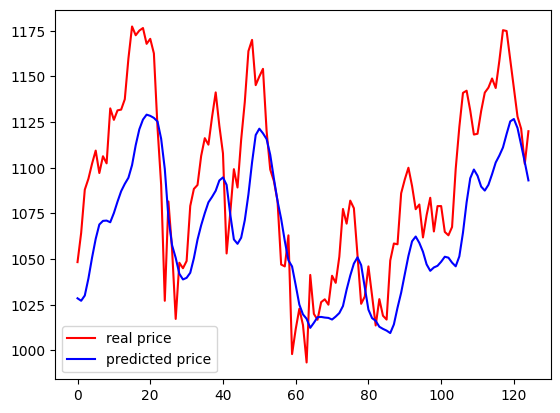

In [82]:

plt.plot(real_prices, color='red', label='real price')
plt.plot(predicted_price, color='blue', label='predicted price')
# Change the variable name here

plt.legend()
plt.show()
